# Data Visualization
Data visalization is extremely important in the work you are going to do. First of all, when first working with a dataset, visualizing the data will help you get a handle on what relationships exist. Also, any presentation is strengthened with an intuitive data visualization.

Today, we will go over the following:
* matplotlib.pyplot
* Seaborn

First off, let's make up some data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

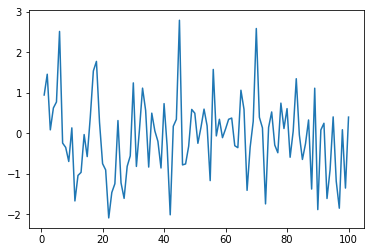

In [2]:
X = np.linspace(1,100,100)
randX = np.random.randn(100)
randY = np.random.randn(100)

plt.plot(X, randY)
plt.show()

Looks about right. Let's try to plot our two random variables together.

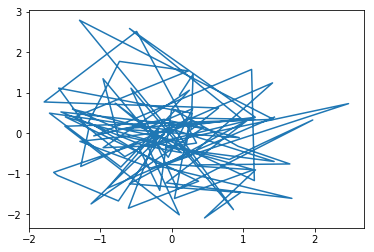

In [3]:
plt.plot(randX, randY)
plt.show()

This is not what we wanted. How do we change modes from a line plot to a scatter plot?

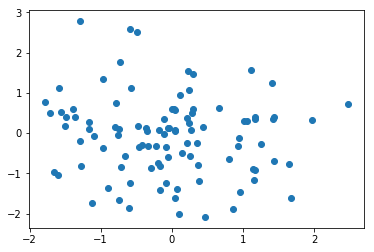

In [4]:
plt.scatter(randX, randY)
plt.show()

This is much better. What if we want to add a title to our plot?

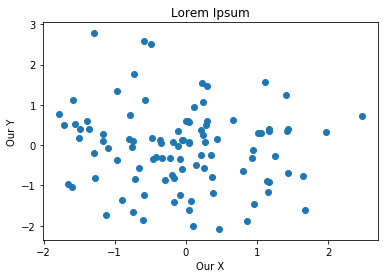

In [5]:
plt.scatter(randX, randY)
plt.xlabel('Our X')
plt.ylabel('Our Y')
plt.title('Lorem Ipsum')
plt.show()

### Exercise:
1. Create a random x and a random y variable
2. Plot them as a scatter plot
3. Add a title, x label, and y label
4. Make the dots blue

What about multiple datasets at once?
There are 2 ways to do this - overlays and subplots. Let's start out with overlays.

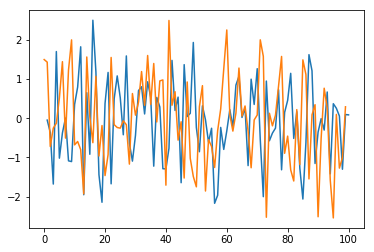

In [6]:
randY1 = np.random.randn(100)
randY2 = np.random.randn(100)
plt.plot(X, randY1, randY2)
plt.show()

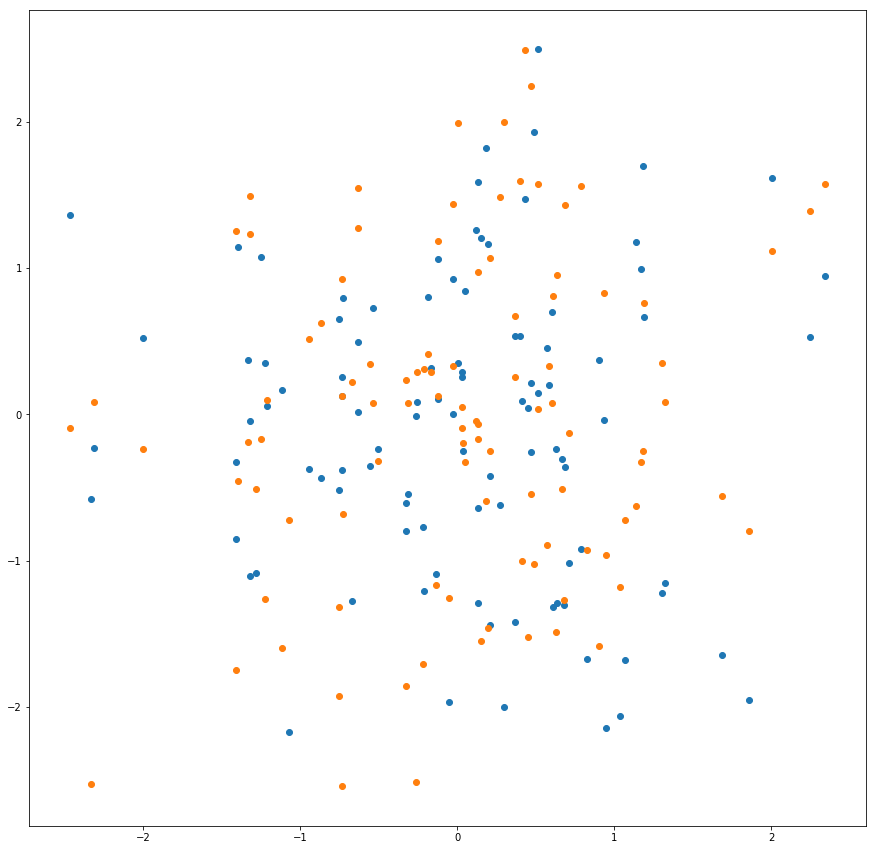

In [7]:
randX = np.random.randn(100)
plt.figure(figsize = (15,15)) # Let's make this one big
plt.scatter(randX, randY1)
plt.scatter(randX, randY2)
plt.show()

Let's look at subplots:

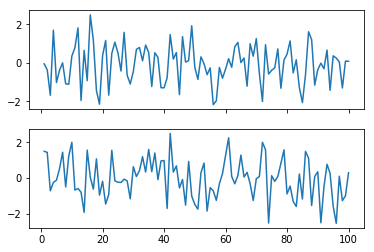

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(X, randY1)
ax2.plot(X, randY2)
plt.show()

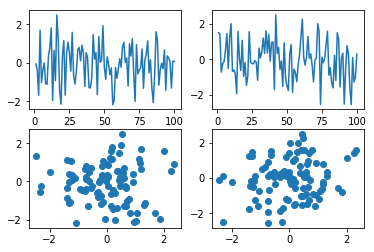

In [9]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(X, randY1)
axes[0, 1].plot(X, randY2)
axes[1, 0].scatter(randX, randY1)
axes[1, 1].scatter(randX, randY2)
plt.show()

A little ugly? You're very right. It's not so hard to google what you would want to change, like:
* spacing between subplots
* colors of plots
* sharing of axes
* subplot titles and axis labels

Exercise: 3x3 grid of plots, make them red, given them each a title.

### Pandas interlude
Pandas has a plotting feature, which actually uses matplotlib in the background. Let's load in some Kaggle housing data, then look at a histogram:

In [10]:
housingdata = pd.read_csv("train.csv")
housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


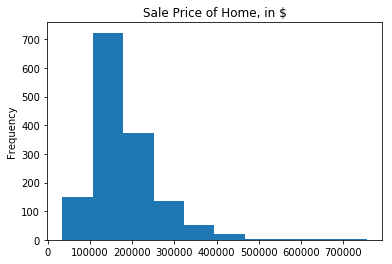

In [11]:
housingdata['SalePrice'].plot.hist(title='Sale Price of Home, in $')
plt.show()

You can use columns of a DataFrame just like we were using our NumPy arrays:

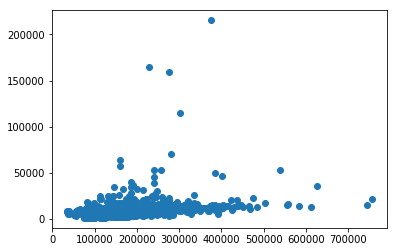

In [12]:
plt.scatter(housingdata['SalePrice'], housingdata['LotArea'])
plt.show()

### Seaborn
A more advanced plotting library is Seaborn. Seaborn lets you do more intricate plots than matplotlib, and looks much better. The syntax is roughly the same, since Seaborn also uses matplotlib in the background.

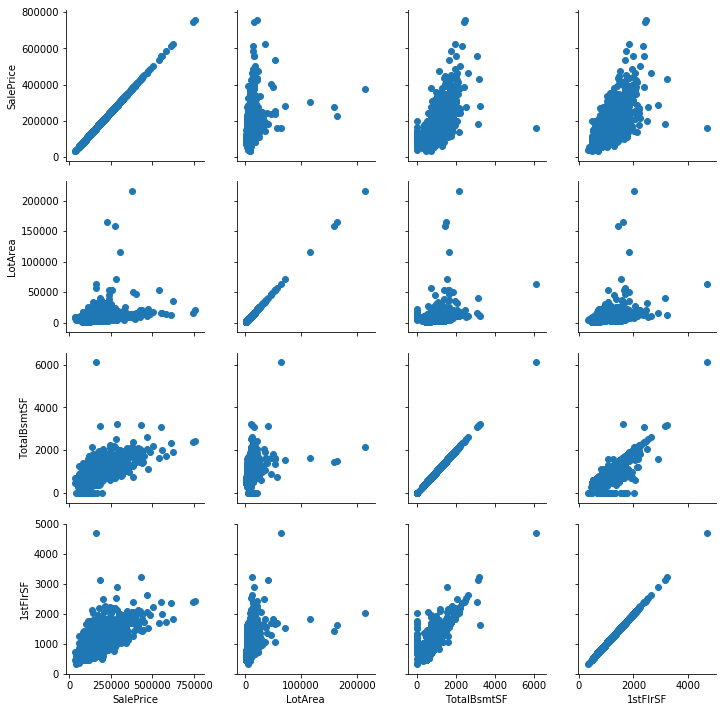

In [13]:
grid = sns.PairGrid(housingdata[['SalePrice', 'LotArea', 'TotalBsmtSF', '1stFlrSF']])
grid.map(plt.scatter)
plt.show()

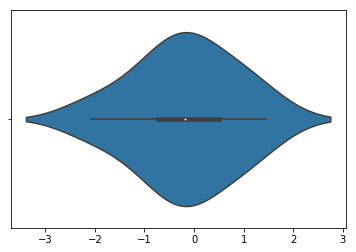

In [14]:
sns.violinplot(x=np.random.randn(10))
plt.show()

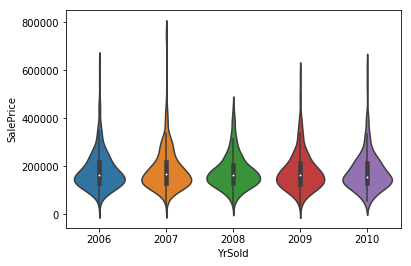

In [15]:
ax = sns.violinplot(x="YrSold", y="SalePrice", data=housingdata)
plt.show()

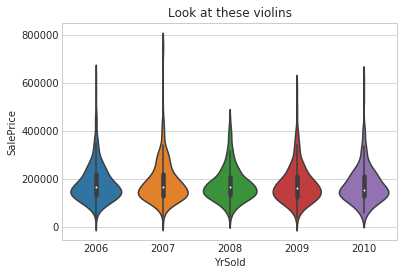

In [16]:
sns.set_style("whitegrid")
ax = sns.violinplot(x="YrSold", y="SalePrice", data=housingdata)
plt.title('Look at these violins')
plt.show()

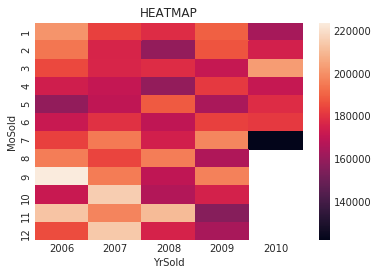

In [17]:
data = housingdata[['YrSold', 'MoSold', 'SalePrice']]
data = data.pivot_table('SalePrice', 'MoSold', 'YrSold')
ax = sns.heatmap(data)
plt.title("HEATMAP")
plt.show()

Exercise:
Make a heatmap of anything. Then, make the color blue.

Things I did not talk about:
* Saving figures